r= 29999.999999999996


<IPython.core.display.Javascript object>


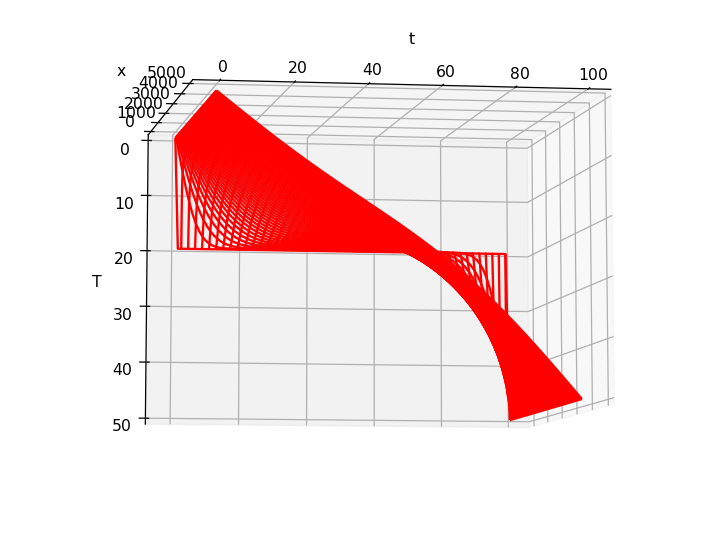

In [1]:
"""
1次元非定常熱伝導
クランク-ニコルソン法
"""

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


Nx =100 # x方向のグリッド点数
Nt =5000# t 方向のグリッド点数
Lx =0.01
Lt =1.5
delta_x=Lx/Nx
delta_t=Lt/Nt
r=delta_t/(delta_x**2)
print("r=",r)

uu = np.zeros([Nx,Nt])  # 求める関数


# 初期条件
#for i in range(1,Nx-1):
uu[:,0] = 20   # 初期条件

#  境界条件
for i in range(Nt):
    uu[0,i] = 0  
    uu[-1,i] = 50

p=np.ones([Nx,Nt])
for i in range(Nx):
    p[i,:] =4e-6

#print("stability=",p[0,0]*r)
q=np.zeros([Nx,Nt])

alpha=np.ones([Nx,Nt])
for i in range(Nx):
    alpha[i,:]= r*p[i,:]/2

# メイン
for j in range(Nt-1):

    Amat=np.zeros([Nx-2,Nx-2])  #連立一次方程式の係数行列の生成
    for i in range(Nx-2):
        Amat[i,i] = 1/alpha[i,j] +2
        if i >=1 :
            Amat[i-1,i] = -1
        if i <= Nx-4 :
                Amat[i+1,i] = -1


    bvec=np.zeros([Nx-2]) # Ax=bのbベクトルの生成
    for i in range(Nx-2):
        bvec[i] =  uu[i,j]+ (1/alpha[i+1,j] - 2)*uu[i+1,j]+uu[i+2,j]+q[i+1,j]
    bvec[0] += uu[0,j+1]
    bvec[Nx-3] += uu[-1,j+1]

    uvec = np.linalg.solve(Amat ,bvec) #連立一次方程式を解く
    for i in range(Nx-2):
        uu[i+1,j+1]=uvec[i]

#for 可視化
x=list(range(Nx))
y=list(range(Nt))

X, Y = np.meshgrid(x,y)

def functz(u):
    z=u[X,Y]
    return z

Z = functz(uu)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z, color='r')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('T')

plt.show()